## Objectives

1. Better promote / predict the "Halfway there" product to a wider audience.

In [1]:
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output

import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear models

from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification 
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.ensemble import RandomForestClassifier     # random forest


# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# new packages
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/Users/lilinhong/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Data Loading and Exploration

In [2]:
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')
df_datadict = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')


Print data for exploration

In [3]:
original_df.head(2)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.0,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.6,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90


In [4]:
df_datadict


,Column,Data Type,Description
0,REVENUE,Float,Total revenue generated from the customer
1,CROSS_SELL_SUCCESS,Integer,Success of promoting Halfway There
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name
5,FAMILY_NAME,string,Last name
6,TOTAL_MEALS_ORDERED,Integer,The total amount of meals orderd by the custom...
7,UNIQUE_MEALS_PURCH,Integer,Number of uniqe meal sets ordered by the customer
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times customer was in contact with c...
9,PRODUCT_CATEGORIES_VIEWED,Integer,Total number of meal categories viewed


## Feature Engineering

- Let's turn emails into a categorical variable where the choices are the following:

0: professional, 

1: personal, 

2: junk,

3: uncategorized

In [5]:
def classify_domain_group(email):
    domain_name = email.split('@')[1]
    personal_email_domains = ['gmail.com', 'yahoo.com', 'protonmail.com']
    professional_email_domains  = ['mmm.com', 
                              'amex.com',
                              'apple.com',
                              'boeing.com',
                              'caterpillar.com',
                              'chevron.com',
                              'cisco.com',
                              'cocacola.com',
                              'disney.com',
                              'dupont.com',
                              'exxon.com',
                              'ge.org',
                              'goldmansacs.com',
                              'homedepot.com',
                              'ibm.com',
                              'intel.com',
                              'jnj.com',
                              'jpmorgan.com',
                              'mcdonalds.com',
                              'merck.com',
                              'microsoft.com',
                              'nike.com',
                              'pfizer.com',
                              'pg.com',
                              'travelers.com',
                              'unitedtech.com',
                              'unitedhealth.com',
                              'verizon.com',
                              'visa.com',
                              'walmart.com']

    junk_email_domains = ['me.com', 'aol.com', 'hotmail.com', 'live.com','msn.com', 'passport.com']
    
    if domain_name in professional_email_domains:
        return 'Professional'
    elif domain_name in personal_email_domains:
        return 'Personal'
    elif domain_name in junk_email_domains:
        return 'Junk'
    else:
        return 'Unclassified'
    
    
original_df['DOMAIN_GROUP'] = original_df['EMAIL'].apply(lambda email: classify_domain_group(email))
original_df['DOMAIN_GROUP'].value_counts()

Personal        861
Professional    696
Junk            389
Name: DOMAIN_GROUP, dtype: int64

Conduct one-hot encoding on columns where this has been deemed appropriate.

In [6]:
# one hot encoding categorical variables

one_hot_domain_group = pd.get_dummies(original_df['DOMAIN_GROUP'])

# joining codings together
original_df = original_df.join([one_hot_domain_group])

original_df


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,DOMAIN_GROUP,Junk,Personal,Professional
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,Junk,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,Professional,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,Personal,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,Professional,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,Professional,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98,Personal,0,1,0
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0,Personal,0,1,0
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0,Personal,0,1,0
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0,Personal,0,1,0


- Outlier Values from looking at the graphs

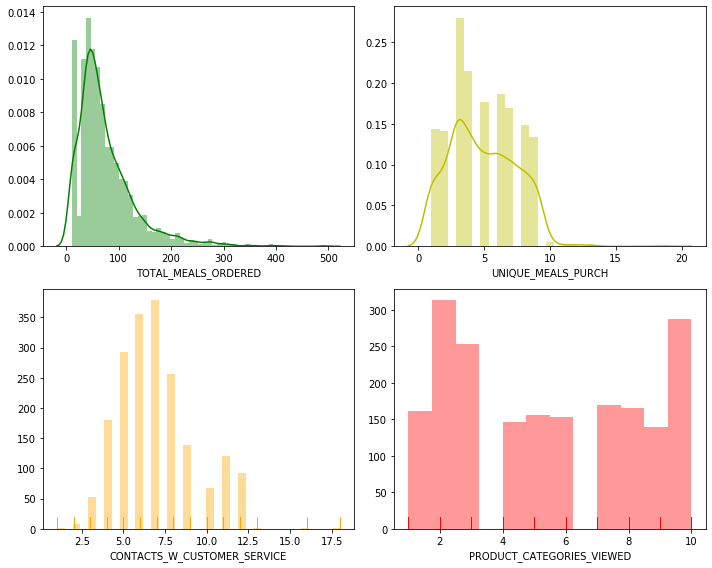

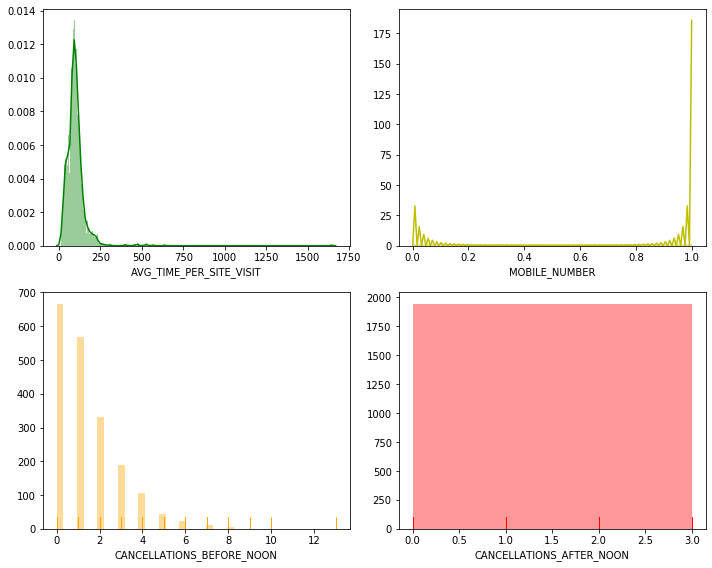

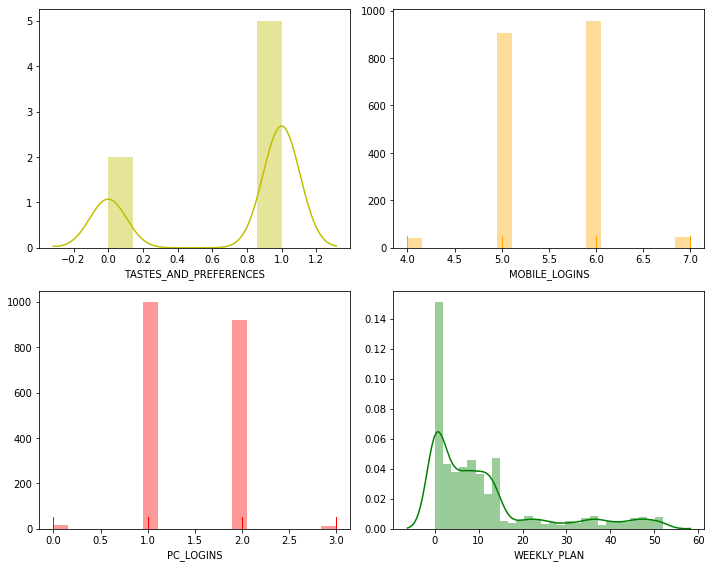

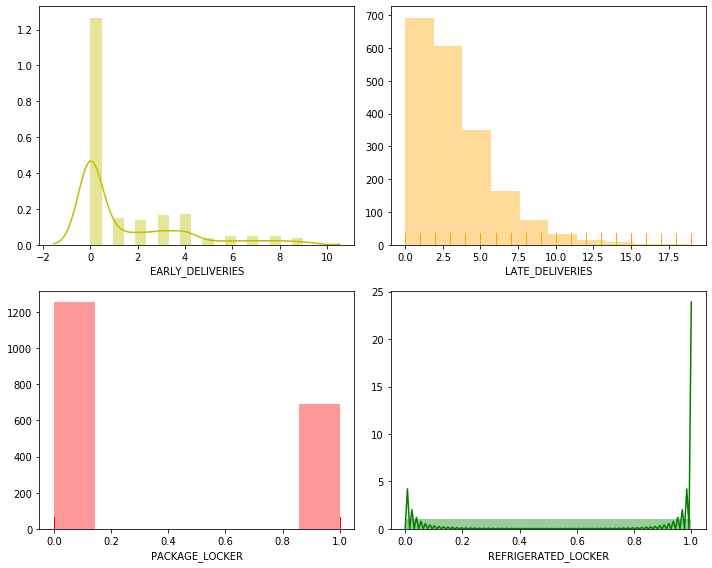

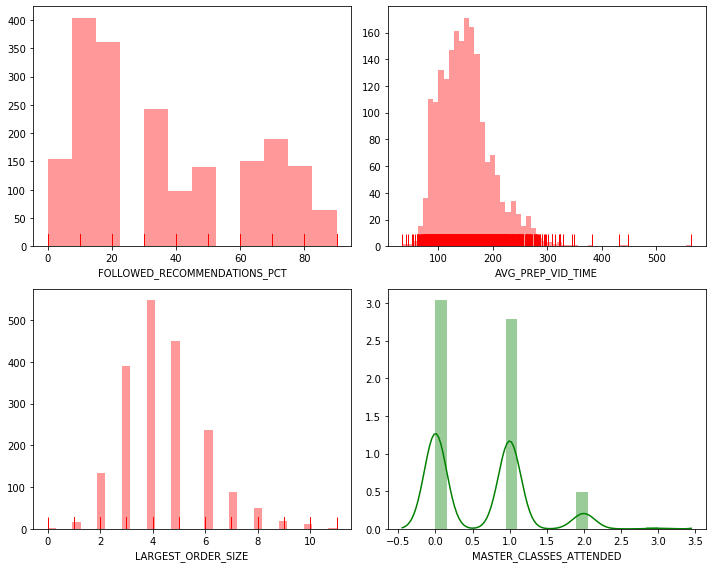

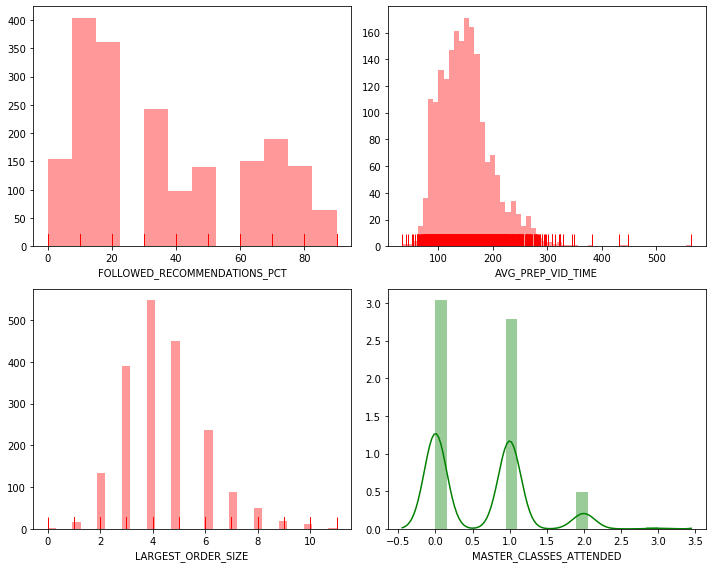

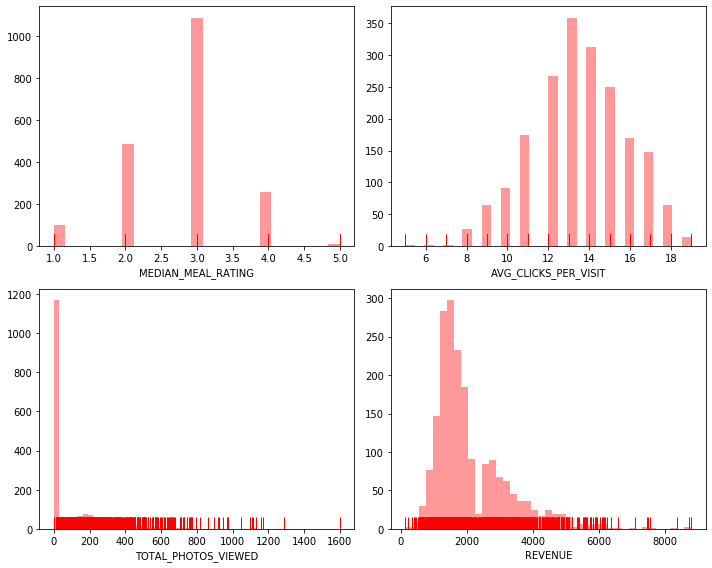

In [7]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')
plt.tight_layout()
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PC_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################
				
plt.subplot(2, 2, 2)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('PACKAGE_LOCKER')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')
plt.tight_layout()
plt.show()

########################
########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################
plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################
plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

########################
				
plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################
plt.subplot(2, 2, 3)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['REVENUE'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('REVENUE')
plt.tight_layout()
plt.savefig('Data Histograms 7 of 4.png')
plt.show()

In [8]:
TOTAL_MEALS_ORDERED_HI = 500
UNIQUE_MEALS_PURCH_HI = 20
CONTACTS_W_CUSTOMER_SERVICE_HI = 18
PRODUCT_CATEGORIES_VIEWED_HI = 10
AVG_TIME_PER_SITE_VISIT_HI = 1500
CANCELLATIONS_BEFORE_NOON_HI = 12
CANCELLATIONS_AFTER_NOON_HI = 3
TASTES_AND_PREFERENCES_HI = 1.5
TASTES_AND_PREFERENCES_LO = -0.2
MOBILE_LOGINS_HI = 7
MOBILE_LOGINS_LO = 4
PC_LOGINS_HI = 3
WEEKLY_PLAN_HI = 60
EARLY_DELIVERIES_HI = 11
LATE_DELIVERIES_HI = 18
PACKAGE_LOCKER_HI = 1
FOLLOWED_RECOMMENDATIONS_PCT_HI=90 
AVG_PREP_VID_TIME_HI = 450
LARGEST_ORDER_SIZE_HI = 11
MASTER_CLASSES_ATTENDED_HI = 3
MEDIAN_MEAL_RATING_HI = 5
AVG_CLICKS_PER_VISIT_HI=19
TOTAL_PHOTOS_VIEWED_HI= 1200
REVENUE_HI = 10000

- Making Outlier into a feature

In [9]:

# TOTAL_MEALS_ORDERED
original_df['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

original_df['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#UNIQUE_MEALS_PURCH
original_df['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

original_df['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
original_df['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]

original_df['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# PRODUCT_CATEGORIES_VIEWED
original_df['OUT_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = original_df.loc[0:,'OUT_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]

original_df['OUT_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_TIME_PER_SITE_VISIT
original_df['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

original_df['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_BEFORE_NOON
original_df['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

original_df['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_AFTER_NOON
original_df['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] >  CANCELLATIONS_AFTER_NOON_HI]

original_df['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# TASTES_AND_PREFERENCES
original_df['OUT_TASTES_AND_PREFERENCES'] = 0
condition_hi = original_df.loc[0:,'OUT_TASTES_AND_PREFERENCES'][original_df['TOTAL_MEALS_ORDERED'] > TASTES_AND_PREFERENCES_HI]
condition_hi = original_df.loc[0:,'OUT_TASTES_AND_PREFERENCES'][original_df['TOTAL_MEALS_ORDERED'] < TASTES_AND_PREFERENCES_LO ]
original_df['OUT_TASTES_AND_PREFERENCES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# MOBILE_LOGINS 
original_df['OUT_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'OUT_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_hi = original_df.loc[0:,'OUT_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]

original_df['OUT_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# PC_LOGINS
original_df['OUT_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'OUT_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_HI]

original_df['OUT_PC_LOGINS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# WEEKLY_PLAN
original_df['OUT_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'OUT_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

original_df['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# EARLY_DELIVERIES
original_df['OUT_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'OUT_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

original_df['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES_ORDERED
original_df['OUT_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'OUT_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# PACKAGE_LOCKER
original_df['OUT_PACKAGE_LOCKER'] = 0
condition_hi = original_df.loc[0:,'OUT_PACKAGE_LOCKER'][original_df['PACKAGE_LOCKER'] > PACKAGE_LOCKER_HI]

original_df['OUT_PACKAGE_LOCKER'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# FOLLOWED_RECOMMENDATIONS_PCT
original_df['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'OUT_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_HI]

original_df['OUT_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_PREP_VID_TIME
original_df['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'OUT_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

original_df['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LARGEST_ORDER_SIZE
original_df['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'OUT_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]

original_df['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

 # MASTER_CLASSES_ATTENDED
original_df['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

original_df['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# MEDIAN_MEAL_RATING
original_df['OUT_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'OUT_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]

original_df['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_CLICKS_PER_VISIT
original_df['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]

original_df['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# TOTAL_PHOTOS_VIEWED
original_df['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]

original_df['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# REVENUE
original_df['OUT_REVENUE'] = 0
condition_hi = original_df.loc[0:,'OUT_REVENUE'][original_df['REVENUE'] > REVENUE_HI]

original_df['OUT_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


Developing Trend-Based Features based on scatter plot

Check missing value 


In [10]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 55 columns):
REVENUE                             1946 non-null float64
CROSS_SELL_SUCCESS                  1946 non-null int64
NAME                                1946 non-null object
EMAIL                               1946 non-null object
FIRST_NAME                          1946 non-null object
FAMILY_NAME                         1899 non-null object
TOTAL_MEALS_ORDERED                 1946 non-null int64
UNIQUE_MEALS_PURCH                  1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE         1946 non-null int64
PRODUCT_CATEGORIES_VIEWED           1946 non-null int64
AVG_TIME_PER_SITE_VISIT             1946 non-null float64
MOBILE_NUMBER                       1946 non-null int64
CANCELLATIONS_BEFORE_NOON           1946 non-null int64
CANCELLATIONS_AFTER_NOON            1946 non-null int64
TASTES_AND_PREFERENCES              1946 non-null int64
MOBILE_LOGINS                       1946 non-

Analyze the dataset one more time. Drop unnecessary columns, and drop features where it has been deemed appropriate to do so.

In [11]:
drop_columns = ['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME','DOMAIN_GROUP']
original_df.drop(drop_columns, axis=1, inplace=True)


In [12]:
original_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 50 columns):
REVENUE                             1946 non-null float64
CROSS_SELL_SUCCESS                  1946 non-null int64
TOTAL_MEALS_ORDERED                 1946 non-null int64
UNIQUE_MEALS_PURCH                  1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE         1946 non-null int64
PRODUCT_CATEGORIES_VIEWED           1946 non-null int64
AVG_TIME_PER_SITE_VISIT             1946 non-null float64
MOBILE_NUMBER                       1946 non-null int64
CANCELLATIONS_BEFORE_NOON           1946 non-null int64
CANCELLATIONS_AFTER_NOON            1946 non-null int64
TASTES_AND_PREFERENCES              1946 non-null int64
MOBILE_LOGINS                       1946 non-null int64
PC_LOGINS                           1946 non-null int64
WEEKLY_PLAN                         1946 non-null int64
EARLY_DELIVERIES                    1946 non-null int64
LATE_DELIVERIES                     1946 non-null

##   Logistic Regression

Complete the code to generate the correlations between the response variable and the explanatory variables (rounded to two decimal places). Then drop some lower correlation columns.

In [13]:
df_corr = original_df.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)


CROSS_SELL_SUCCESS                  1.00
FOLLOWED_RECOMMENDATIONS_PCT        0.46
Professional                        0.19
CANCELLATIONS_BEFORE_NOON           0.16
MOBILE_NUMBER                       0.10
TASTES_AND_PREFERENCES              0.08
REFRIGERATED_LOCKER                 0.07
MASTER_CLASSES_ATTENDED             0.04
MOBILE_LOGINS                       0.04
CONTACTS_W_CUSTOMER_SERVICE         0.04
PACKAGE_LOCKER                      0.04
Personal                            0.04
MEDIAN_MEAL_RATING                  0.03
AVG_PREP_VID_TIME                   0.03
EARLY_DELIVERIES                    0.02
OUT_AVG_TIME_PER_SITE_VISIT         0.02
OUT_CANCELLATIONS_BEFORE_NOON       0.02
LARGEST_ORDER_SIZE                  0.02
TOTAL_PHOTOS_VIEWED                 0.01
TOTAL_MEALS_ORDERED                 0.01
LATE_DELIVERIES                     0.01
AVG_TIME_PER_SITE_VISIT             0.01
UNIQUE_MEALS_PURCH                  0.00
PRODUCT_CATEGORIES_VIEWED           0.00
REVENUE         

- create formula for logit regression 

In [14]:
column_names = original_df.columns
drop_cols = ['REVENUE', 'CROSS_SELL_SUCCESS']
df_revenue = original_df.loc[:, 'REVENUE']
df_half = original_df.loc[:, 'CROSS_SELL_SUCCESS']
df_customer_data = original_df.drop(drop_cols, axis=1)

# train-test split with stratification
X_train_half, X_test_half, y_train_half, y_test_half = train_test_split(
            df_customer_data,
            df_half,
            test_size = 0.25,
            random_state = 508,
            stratify = df_half)


# merging training data for statsmodels
half_train = pd.concat([X_train_half, y_train_half], axis = 1)


In [15]:
for val in column_names:
    if val not in drop_cols:
        print(f"half_train['{val}'] +")
        

half_train['TOTAL_MEALS_ORDERED'] +
half_train['UNIQUE_MEALS_PURCH'] +
half_train['CONTACTS_W_CUSTOMER_SERVICE'] +
half_train['PRODUCT_CATEGORIES_VIEWED'] +
half_train['AVG_TIME_PER_SITE_VISIT'] +
half_train['MOBILE_NUMBER'] +
half_train['CANCELLATIONS_BEFORE_NOON'] +
half_train['CANCELLATIONS_AFTER_NOON'] +
half_train['TASTES_AND_PREFERENCES'] +
half_train['MOBILE_LOGINS'] +
half_train['PC_LOGINS'] +
half_train['WEEKLY_PLAN'] +
half_train['EARLY_DELIVERIES'] +
half_train['LATE_DELIVERIES'] +
half_train['PACKAGE_LOCKER'] +
half_train['REFRIGERATED_LOCKER'] +
half_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
half_train['AVG_PREP_VID_TIME'] +
half_train['LARGEST_ORDER_SIZE'] +
half_train['MASTER_CLASSES_ATTENDED'] +
half_train['MEDIAN_MEAL_RATING'] +
half_train['AVG_CLICKS_PER_VISIT'] +
half_train['TOTAL_PHOTOS_VIEWED'] +
half_train['Junk'] +
half_train['Personal'] +
half_train['Professional'] +
half_train['OUT_TOTAL_MEALS_ORDERED'] +
half_train['OUT_UNIQUE_MEALS_PURCH'] +
half_train['OUT_CON

In [16]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        half_train['TOTAL_MEALS_ORDERED'] +
                                        half_train['UNIQUE_MEALS_PURCH'] +
                                        half_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                        half_train['PRODUCT_CATEGORIES_VIEWED'] +
                                        half_train['AVG_TIME_PER_SITE_VISIT'] +
                                        half_train['MOBILE_NUMBER'] +
                                        half_train['CANCELLATIONS_BEFORE_NOON'] +
                                        half_train['CANCELLATIONS_AFTER_NOON'] +
                                        half_train['TASTES_AND_PREFERENCES'] +
                                        half_train['MOBILE_LOGINS'] +
                                        half_train['PC_LOGINS'] +
                                        half_train['WEEKLY_PLAN'] +
                                        half_train['EARLY_DELIVERIES'] +
                                        half_train['LATE_DELIVERIES'] +
                                        half_train['PACKAGE_LOCKER'] +
                                        half_train['REFRIGERATED_LOCKER'] +
                                        half_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                        half_train['AVG_PREP_VID_TIME'] +
                                        half_train['LARGEST_ORDER_SIZE'] +
                                        half_train['MASTER_CLASSES_ATTENDED'] +
                                        half_train['MEDIAN_MEAL_RATING'] +
                                        half_train['AVG_CLICKS_PER_VISIT'] +
                                        half_train['TOTAL_PHOTOS_VIEWED'] +
                                        half_train['Junk'] +
                                        half_train['Personal'] +
                                        half_train['Professional'] """,
                                        data    =  half_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()


Optimization terminated successfully.
         Current function value: 0.430939
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1433
Method:                           MLE   Df Model:                           25
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.3137
Time:                        22:52:59   Log-Likelihood:                -628.74
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                2.067e-105
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -2.7874   1.97e+07  -1.41e-07      1.000   -3.87e+07    3.87e+07
half_train['TOTAL_MEALS_ORDERED']             -0.0009      0.002     -0.553      0.580      -0.004       0.002
half_train['UNIQUE_MEALS_PURCH']               0.0175      0.029      0.601      0.548      -0.039       0.074
half_train['CONTACTS_W_CUSTOMER_SERVICE']      0.0317      0.032      1.002      0.316      -0.030       0.094
half_train['PRODUCT_CATEGORIES_VIEWED']        0.0117      0.023      0.506      0.613      -0.034       0.057
half_train['AVG_TIME_PER_SITE_VISIT']          0.0007      0.001      0.684      0.494      -0.001       0.003
half_train['MOBILE_NUMBER']                    0.8024      0.209      3.835      0.000       0.392       1.212
half_train['CANCELLATIONS_BEFORE_NOON']        0.2691      0.050      5.396      0.000       0.171       0.367
half_train['CANCELLATIONS_AFTER_NOON']        -0.3410      0.156     -2.189      0.029      -0.646      -0.036
half_train['TASTES_AND_PREFERENCES']           0.5310      0.152      3.488      0.000       0.233       0.829
half_train['MOBILE_LOGINS']                    0.1761      0.121      1.460      0.144      -0.060       0.413
half_train['PC_LOGINS']                       -0.1334      0.133     -1.003      0.316      -0.394       0.127
half_train['WEEKLY_PLAN']                  -8.884e-05      0.005     -0.018      0.986      -0.010       0.010
half_train['EARLY_DELIVERIES']                 0.0305      0.031      0.974      0.330      -0.031       0.092
half_train['LATE_DELIVERIES']                  0.0201      0.025      0.805      0.421      -0.029       0.069
half_train['PACKAGE_LOCKER']                  -0.0243      0.165     -0.147      0.883      -0.347       0.298
half_train['REFRIGERATED_LOCKER']              0.3400      0.265      1.283      0.200      -0.180       0.860
half_train['FOLLOWED_RECOMMENDATIONS_PCT']     0.0584      0.004     14.234      0.000       0.050       0.066
half_train['AVG_PREP_VID_TIME']                0.0022      0.003      0.791      0.429      -0.003       0.008
half_train['LARGEST_ORDER_SIZE']               0.0281      0.075      0.372      0.710      -0.120       0.176
half_train['MASTER_CLASSES_ATTENDED']         -0.0211      0.128     -0.165      0.869      -0.272       0.230
half_train['MEDIAN_MEAL_RATING']              -0.0219      0.186     -0.118      0.906      -0.387       0.343
half_train['AVG_CLICKS_PER_VISIT']            -0.0202      0.058     -0.348      0.728      -0.134       0.094
half_train['TOTAL_PHOTOS_VIEWED']             -0.0005      0.000     -1.086      0.277      -0.001       0.000
half_train['Junk']                            -2.0378   1.97e+07  -1.03e-07      1.000   -3.87e+07    3.87e+07
half_train['Personal']                        -0.6719   1.97e+07  -3.41e-08      1.000   -3.87e+07    3.87e+07
half_train['Profession

- Based on the output above, remove all variables that were deemed insignificant based on their p-values. Once finished, check the p-values again to ensure that all variables are still significant.

Note: 'nan' is also considered insignificant (excluding the intercept, which must always be included).


In [17]:
# instantiating a logistic regression model object
logistic_sig = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        half_train['MOBILE_NUMBER'] +
                                        half_train['CANCELLATIONS_BEFORE_NOON'] +
                                        half_train['CANCELLATIONS_AFTER_NOON'] +
                                        half_train['TASTES_AND_PREFERENCES'] +
                                        half_train['FOLLOWED_RECOMMENDATIONS_PCT'] """,
                                        data    = half_train)


# fitting the model object
results_sig = logistic_sig.fit()


# checking the results SUMMARY
results_sig.summary()



Optimization terminated successfully.
         Current function value: 0.473795
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.2455
Time:                        22:52:59   Log-Likelihood:                -691.27
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.281e-95
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -2.1007      0.243     -8.650      0.000      -2.577      -1.625
half_train['MOBILE_NUMBER']                    0.7193      0.196      3.664      0.000       0.335       1.104
half_train['CANCELLATIONS_BEFORE_NOON']        0.2552      0.047      5.423      0.000       0.163       0.347
half_train['CANCELLATIONS_AFTER_NOON']        -0.3059      0.146     -2.102      0.036      -0.591      -0.021
half_train['TASTES_AND_PREFERENCES']           0.5267      0.142      3.696      0.000       0.247       0.806
half_train['FOLLOWED_RECOMMENDATIONS_PCT']     0.0557      0.004     14.867      0.000       0.048       0.063
==============================================================================================================
"""

## Model Exploration

####  Standardized Linear Regression with Sklearn

- split train data and test data
- explanatory variable sets

In [18]:
#only chooose significant value
v = [
    'MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES','FOLLOWED_RECOMMENDATIONS_PCT'
]
  

X_data = original_df.loc[:,v]
y_target = original_df.loc[:,'CROSS_SELL_SUCCESS']


# train-test split with stratification
X_train_half, X_test_half, y_train_half, y_test_half = train_test_split(
            X_data,
            y_target,
            test_size = 0.25,
            random_state = 42,
            stratify = y_target )




In [19]:
# INSTANTIATING a StandardScaler() object
X_train_half_scaler = StandardScaler().fit_transform(X_train_half)
X_test_half_scaler = StandardScaler().fit_transform(X_test_half)

# checking the results
X_train_half_scaler



array([[ 0.37157169,  0.39618678, -0.37528733,  0.62836094, -0.96948509],
       [-2.69127068, -0.25844121, -0.37528733,  0.62836094,  1.29791338],
       [ 0.37157169, -0.9130692 ,  1.9646452 ,  0.62836094,  1.67581312],
       ...,
       [ 0.37157169,  1.70544277, -0.37528733,  0.62836094, -0.59158534],
       [ 0.37157169,  0.39618678, -0.37528733,  0.62836094, -1.34738483],
       [ 0.37157169, -0.25844121, -0.37528733,  0.62836094, -0.2136856 ]])

In [20]:
# INSTANTIATING a logistic regression model with default values
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            warm_start = False,
                            random_state = 802)


# FITTING the training data
logreg_fit = logreg.fit(X_train_half, y_train_half)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test_half)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train_half, y_train_half).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test_half, y_test_half).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_half,
                                          y_score = logreg_pred).round(4))


Training ACCURACY: 0.7142
Testing  ACCURACY: 0.7023
AUC Score        : 0.6539


#### RandomForestClassifier


In [21]:
  
rfc = RandomForestClassifier(n_estimators=7)

params = {
    'n_estimators':range(30,80,5),
    'max_features':['auto','sqrt','log2',None],
    'max_depth':range(5,15,2)
}

grid_search = GridSearchCV(rfc,params,cv=3) 
grid_search.fit(X_train_half_scaler, y_train_half)

train_score = grid_search.score(X_train_half,y_train_half)
test_score = grid_search.score(X_test_half,y_test_half)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
#         feature_importances = grid_search.feature_importances_

print("Tuned Parameters : {}".format(best_params))
print("Train set score:{:.4f}".format(train_score))
print("Test set score:{:.4f}".format(test_score))

print("Best score on train set:{:.4f}".format(grid_search.best_score_),'\n')


Tuned Parameters : {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
Train set score:0.6785
Test set score:0.6797
Best score on train set:0.7683 



#### Decision Tree

In [22]:

# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img



Training ACCURACY: 0.7772
Testing  ACCURACY: 0.8008
AUC Score        : 0.7992


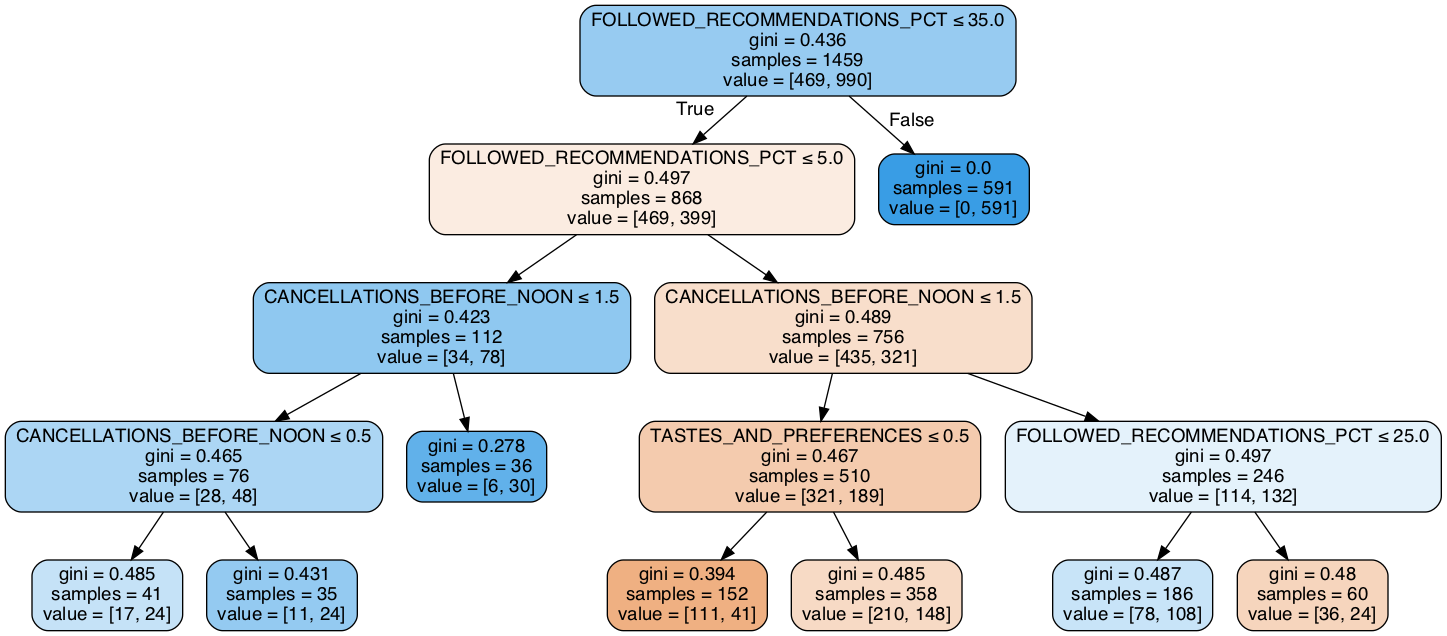

In [23]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train_half, y_train_half)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test_half)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train_half, y_train_half).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test_half, y_test_half).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_half,
                                          y_score = tree_pred).round(4))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train_half)


#### Develop a GradientBoostingClassifier model with default values 

In [24]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 802)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train_half, y_train_half)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test_half)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train_half, y_train_half).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test_half, y_test_half).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_half,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7875
Testing ACCURACY : 0.7947
AUC Score        : 0.7981


##  Hyperparameter Tuning 

#### Logistic Regression with Tuned Hyperparameters

In [25]:
########################################
# GridSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              max_iter = 1000,
                              random_state = 802)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(X_data, y_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'C': 0.5, 'warm_start': True}
Tuned CV AUC      : 0.5674


In [26]:
lr_tuned_cv.best_estimator_


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=802, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [27]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test_half)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train_half, y_train_half).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test_half, y_test_half).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_half,
                                          y_score = lr_tuned_pred).round(4))

#lr_tuned.cor

Training ACCURACY: 0.7128
Testing  ACCURACY: 0.7043
AUC Score        : 0.6554


##### Hyperparameter Tuning on Classification Trees

In [28]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 802)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(X_data, y_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))



Tuned Parameters  : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 40, 'splitter': 'best'}
Tuned Training AUC: 0.6783


In [29]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test_half)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train_half, y_train_half).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test_half, y_test_half).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_half,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.7772
Testing  ACCURACY: 0.8008
AUC Score        : 0.7992


#### Random Forest with Tuned Hyperparameters
Run the following code to automate hyperparameter optimization for a random forest model.

In [30]:
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_forest_grid = RandomForestClassifier(random_state = 802)


# GridSearchCV object
full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
                              param_grid = param_grid,
                              cv         = 3,
                              scoring    = make_scorer(roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_forest_cv.fit(X_data, y_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_forest_cv.best_params_)
print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

Tuned Parameters  : {'bootstrap': False, 'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100, 'warm_start': True}
Tuned Training AUC: 0.622


In [31]:
# INSTANTIATING the model object without hyperparameters
full_rf_tuned = RandomForestClassifier(bootstrap        = True,
                                       criterion        = 'gini',
                                       min_samples_leaf = 1,
                                       n_estimators     = 100,
                                       warm_start       = True,
                                       random_state     = 222)



# FIT step is needed as we are not using .best_estimator
full_rf_tuned_fit = full_rf_tuned.fit(X_train_half, y_train_half)


# PREDICTING based on the testing set
full_rf_tuned_pred = full_rf_tuned_fit.predict(X_test_half)


# SCORING the results
print('Training ACCURACY:', full_rf_tuned_fit.score(X_train_half, y_train_half).round(4))
print('Testing  ACCURACY:', full_rf_tuned_fit.score(X_test_half, y_test_half).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_half,
                                          y_score = full_rf_tuned_pred).round(4))

Training ACCURACY: 0.8115
Testing  ACCURACY: 0.7844
AUC Score        : 0.7872


#### Complete the code to perform hyperparameter optimization on a GBM model

In [32]:
# declaring a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 802)


# GridSearchCV object
full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                        needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(X_data, y_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'learning_rate': 0.7000000000000001, 'max_depth': 2, 'n_estimators': 150}
Tuned Training AUC: 0.6356


In [33]:
# INSTANTIATING the model object with hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.7,
                                       max_depth     = 2,
                                       n_estimators  = 150,
                                       random_state  = 802)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train_half, y_train_half)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test_half)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train_half, y_train_half).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test_half, y_test_half).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_half,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7964
Testing  ACCURACY: 0.7906
AUC Score        : 0.7968
